In [3]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [5]:
worksheet = gc.open('vishu dataset').sheet1

In [6]:
rows = worksheet.get_all_values()

In [19]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df

,INPUT,OUTPUT
0,1.0,6.0
1,2.0,11.0
2,3.0,16.0
3,4.0,21.0
4,5.0,26.0
5,6.0,31.0
6,7.0,36.0
7,8.0,41.0
8,9.0,46.0
9,10.0,51.0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
# To scale
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
X = df[['INPUT']].values
y = df[['OUTPUT']].values

X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [23]:
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [24]:
model.compile(optimizer='rmsprop',loss = 'mse')

Streaming output truncated to the last 5000 lines.
Epoch 1321/5000
1/1 [==============================] - 0s 5ms/step - loss: 997.3618
Epoch 1322/5000
1/1 [==============================] - 0s 6ms/step - loss: 994.6598
Epoch 1323/5000
1/1 [==============================] - 0s 6ms/step - loss: 991.9596
Epoch 1324/5000
1/1 [==============================] - 0s 7ms/step - loss: 989.2611
Epoch 1325/5000
1/1 [==============================] - 0s 5ms/step - loss: 986.5645
Epoch 1326/5000
1/1 [==============================] - 0s 5ms/step - loss: 983.8696
Epoch 1327/5000
1/1 [==============================] - 0s 7ms/step - loss: 981.1765
Epoch 1328/5000
1/1 [==============================] - 0s 5ms/step - loss: 978.4854
Epoch 1329/5000
1/1 [==============================] - 0s 7ms/step - loss: 975.7958
Epoch 1330/5000
1/1 [==============================] - 0s 10ms/step - loss: 973.1083
Epoch 1331/5000
1/1 [==============================] - 0s 5ms/step - loss: 970.4224
Epoch 1332/5000
1/1 [===

<Axes: >

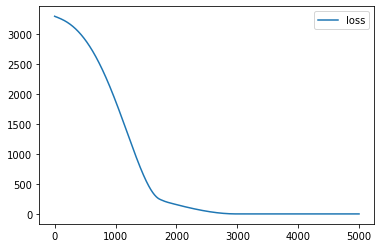

In [25]:
model.fit(X_train1,y_train,epochs=5000)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [26]:
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,y_test)
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.0023


0.0023347812239080667

In [27]:
## new prediction
X_n1 = [[500]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 80ms/step


array([[2502.3694]], dtype=float32)